# Import Libraries

In [ ]:
!pip install handyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.3/317.3 MB 1.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.3-py2.py3-none-any.whl size=317840625 sha256=d7f894ef9163da7be9deeee2e4fd52bd7262a071edd1dbc686a4ef7591e23ff7
  Stored in directory: /root/.cache/pip/wheels/1b/3a/92/28b93e2fbfdbb07509ca4d6f50c5e407f48dce4ddbda69a4ab
Successfully built pyspark


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, StringType, IntegerType, FloatType, DoubleType, TimestampType

# Initialize Spark Session
spark = SparkSession.builder \
    .appName("NYC Taxi Data Analysis") \
    .getOrCreate()


# Drive Mount and Read Data

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
from pyspark.sql.types import StructType, StructField, StringType, DateType

schema = StructType([
    StructField("ID", StringType(), True),
    StructField("Death", StringType(), True),
    StructField("Injured", StringType(), True),
    StructField("Vehical type", StringType(), True),
    StructField("Time", StringType(), True),
    StructField("City", StringType(), True),
    StructField("Division", StringType(), True),
    StructField("Description", StringType(), True),
    StructField("Day", StringType(), True),
    StructField("Month", StringType(), True),
    StructField("Year", StringType(), True),# Updated to DateType
])


In [ ]:
df = spark.read.csv('/content/Accident Dataset - Sheet1.csv',header=True, schema=schema)
df.printSchema()
df.show(5, truncate=False)

root
 |-- ID: string (nullable = true)
 |-- Death: string (nullable = true)
 |-- Injured: string (nullable = true)
 |-- Vehical type: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)

+---+-----+-------+------------+-----+-----------+----------+-----------+---+-----+----+
|ID |Death|Injured|Vehical type|Time |City       |Division  |Description|Day|Month|Year|
+---+-----+-------+------------+-----+-----------+----------+-----------+---+-----+----+
|1  |1    |1      |Motorcycle  |Day  |Jhenaidah  |Khulna    |12/29/2019 |29 |12   |2019|
|2  |1    |0      |Tractor     |Day  |Gopalganj  |Dhaka     |12/29/2019 |29 |12   |2019|
|3  |3    |2      |Car         |Day  |Fouzdarhat |chattogram|12/28/2019 |28 |12   |2019|
|4  |1    |0      |Motorcycle  |Night|chatt

In [ ]:
df.select("Description").show(5, truncate=False)

+-----------+
|Description|
+-----------+
|12/29/2019 |
|12/29/2019 |
|12/28/2019 |
|12/27/2019 |
|12/21/2019 |
+-----------+
only showing top 5 rows



In [ ]:
# df = df1.sample(fraction=0.01)

# Data Cleaning

In [ ]:
from pyspark.sql.functions import col, count, when

# Inspect the dataset
df.printSchema()
df.describe().show()

# Check for missing values
missing_values = df.select([
    count(when(col(c).isNull(), c)).alias(c) for c in df.columns
])
missing_values.show()

# Drop rows with any null values (optional, based on your needs)
df_cleaned = df.dropna()

# Show the cleaned data
df_cleaned.show(5)

root
 |-- ID: string (nullable = true)
 |-- Death: string (nullable = true)
 |-- Injured: string (nullable = true)
 |-- Vehical type: string (nullable = true)
 |-- Time: string (nullable = true)
 |-- City: string (nullable = true)
 |-- Division: string (nullable = true)
 |-- Description: string (nullable = true)
 |-- Day: string (nullable = true)
 |-- Month: string (nullable = true)
 |-- Year: string (nullable = true)

+-------+------------------+------------------+-----------------+-------------+-----+-------+----------+-----------+------------------+------------------+------+
|summary|                ID|             Death|          Injured| Vehical type| Time|   City|  Division|Description|               Day|             Month|  Year|
+-------+------------------+------------------+-----------------+-------------+-----+-------+----------+-----------+------------------+------------------+------+
|  count|               441|               441|              441|          441|  441|    44

In [ ]:
df_cleaned.count()

441

In [ ]:
df = df_cleaned

# Feature Engineering

In [ ]:
# Summary statistics for numerical features
df.describe().show()

# Summary statistics for categorical features
categorical_features = ['Vehical type', 'Time', 'City', 'Division']
for feature in categorical_features:
    df.groupBy(feature).count().show()

+-------+------------------+------------------+-----------------+-------------+-----+-------+----------+-----------+------------------+------------------+------+
|summary|                ID|             Death|          Injured| Vehical type| Time|   City|  Division|Description|               Day|             Month|  Year|
+-------+------------------+------------------+-----------------+-------------+-----+-------+----------+-----------+------------------+------------------+------+
|  count|               441|               441|              441|          441|  441|    441|       441|        441|               441|               441|   441|
|   mean|221.00907029478458| 2.058956916099773|3.437641723356009|         NULL| NULL|   NULL|      NULL|       NULL|15.893424036281179| 6.063492063492063|2019.0|
| stddev| 127.4656100119738|1.8625905226210464|7.466978083443047|         NULL| NULL|   NULL|      NULL|       NULL| 8.804439857473923|3.3371947331357092|   0.0|
|    min|                 1|

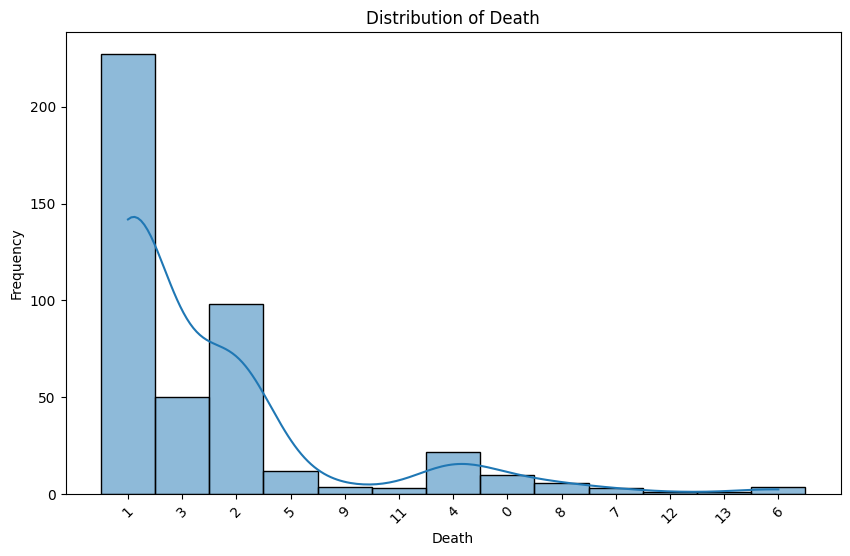

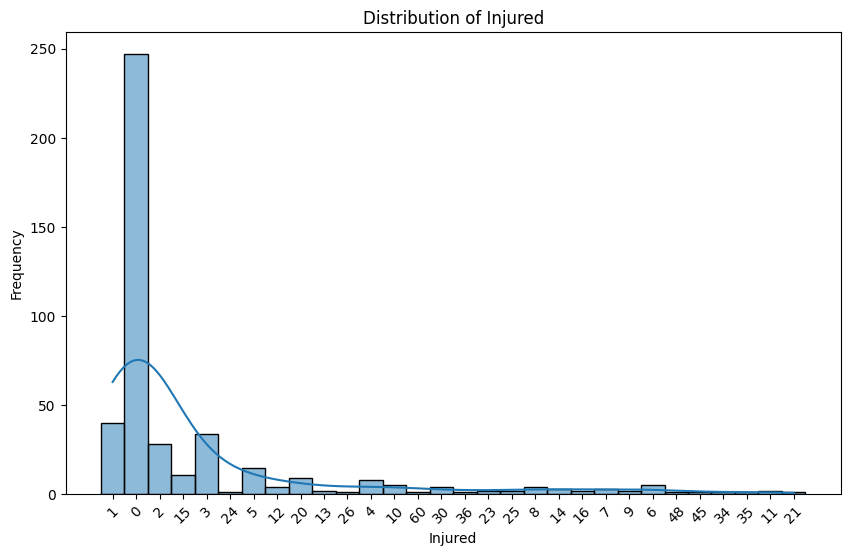

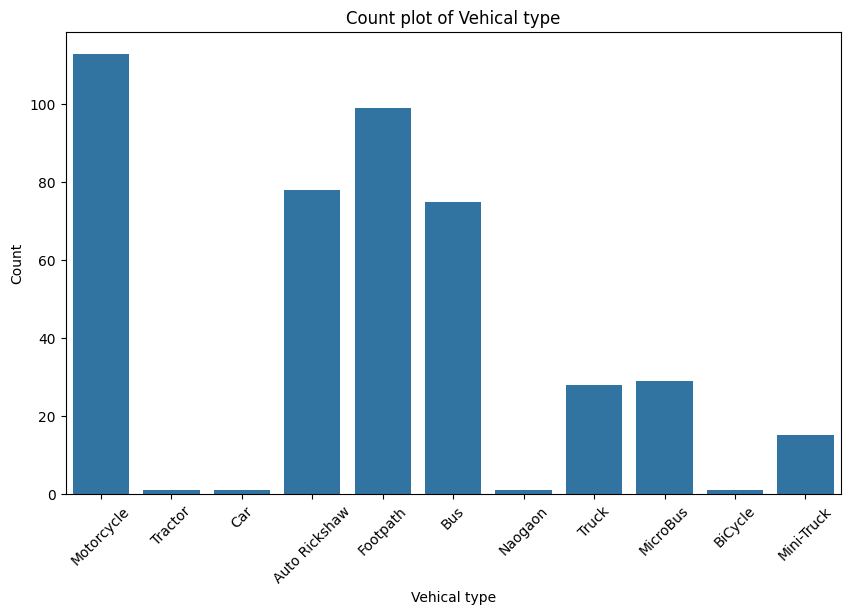

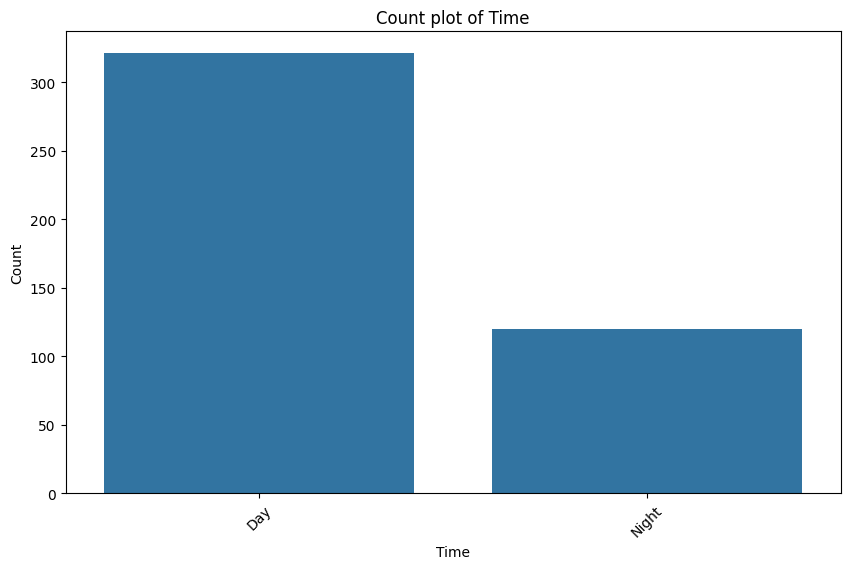

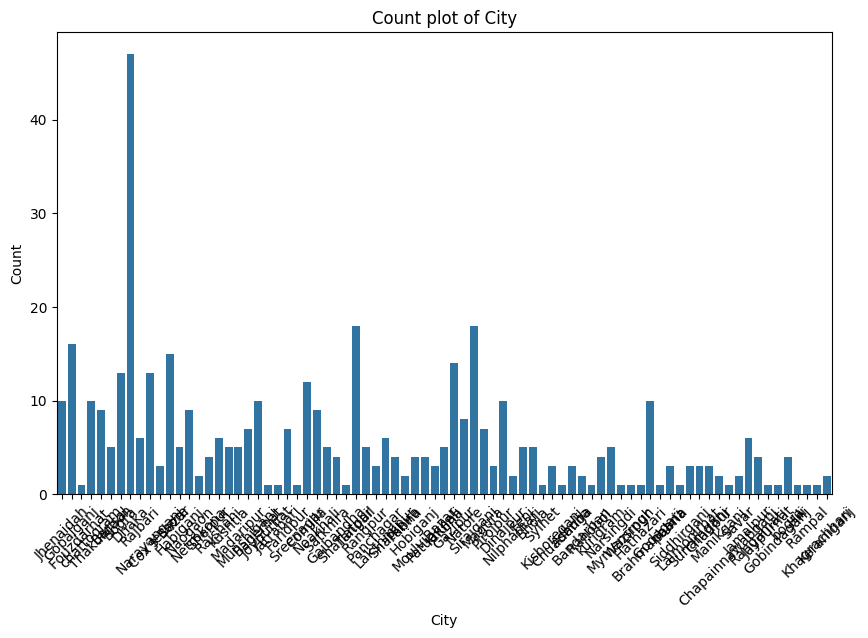

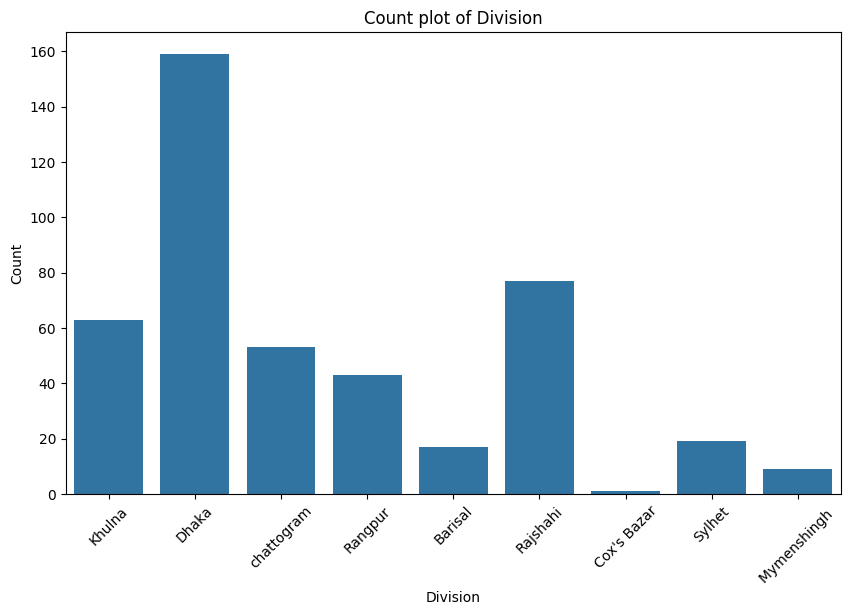

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to Pandas for plotting
df_pd = df.toPandas()

# Distribution plots for numerical features
numerical_features = ['Death', 'Injured']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(df_pd[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.show()

# Count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df_pd[feature])
    plt.title(f'Count plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()


# City

<Figure size 1400x600 with 0 Axes>

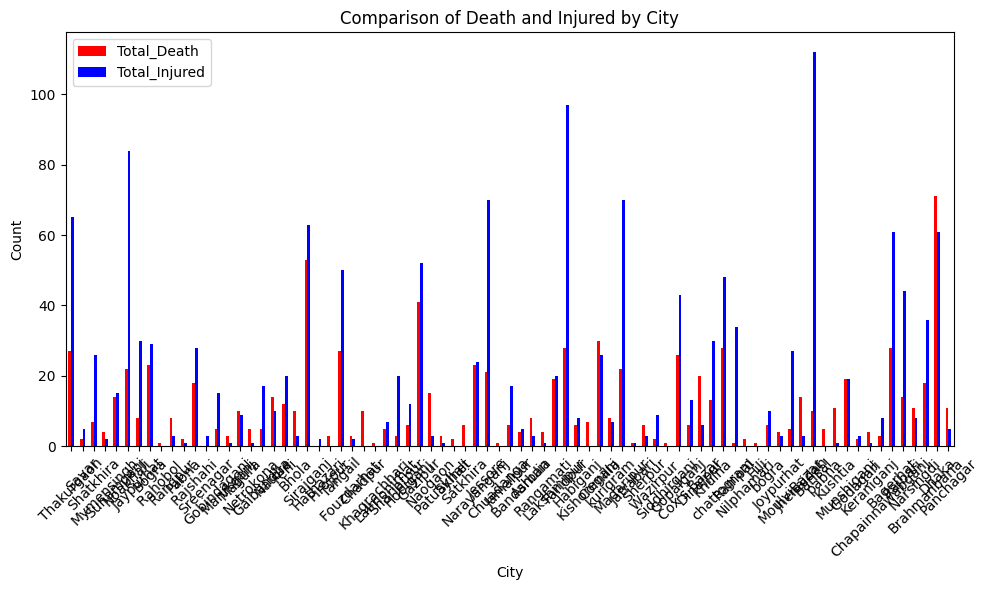

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'City' and calculate the sum of 'Death' and 'Injured' for each city
city_totals = df.groupBy('City').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['City', 'Total_Death', 'Total_Injured']

# Set the plot size
plt.figure(figsize=(14, 6))

# Create a grouped bar plot
city_totals.plot(kind='bar', x='City', y=['Total_Death', 'Total_Injured'], figsize=(10, 6), color=['red', 'blue'])

# Set titles and labels
plt.title('Comparison of Death and Injured by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# DIvision

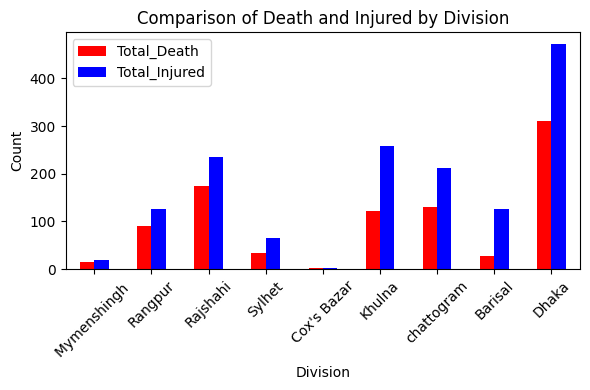

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Division' and calculate the sum of 'Death' and 'Injured' for each city
city_totals = df.groupBy('Division').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['Division', 'Total_Death', 'Total_Injured']

# Create a grouped bar plot
city_totals.plot(kind='bar', x='Division', y=['Total_Death', 'Total_Injured'], figsize=(6, 4), color=['red', 'blue'])

# Set titles and labels
plt.title('Comparison of Death and Injured by Division')
plt.xlabel('Division')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Vehicle

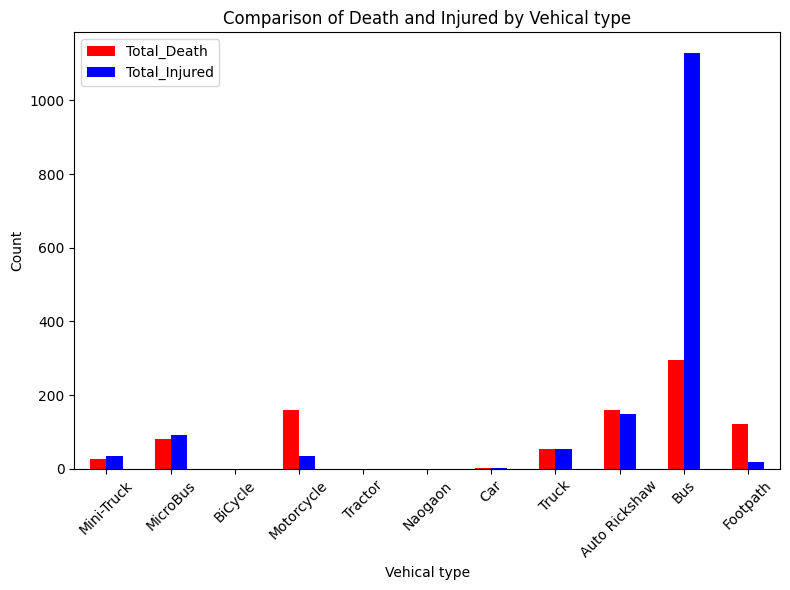

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Vehical type' and calculate the sum of 'Death' and 'Injured' for each city
city_totals = df.groupBy('Vehical type').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['Vehical type', 'Total_Death', 'Total_Injured']

# Create a grouped bar plot
city_totals.plot(kind='bar', x='Vehical type', y=['Total_Death', 'Total_Injured'], figsize=(8, 6), color=['red', 'blue'])

# Set titles and labels
plt.title('Comparison of Death and Injured by Vehical type')
plt.xlabel('Vehical type')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# City

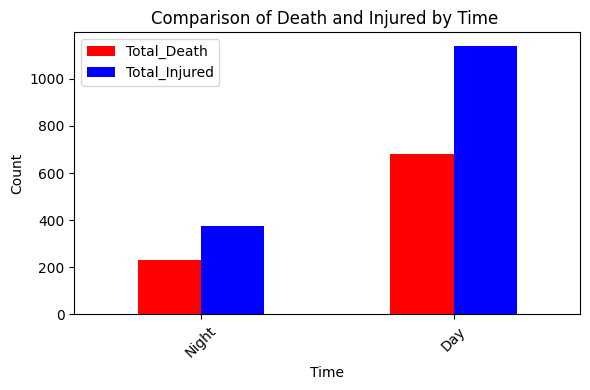

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Time ' and calculate the sum of 'Death' and 'Injured' for each city
city_totals = df.groupBy('Time').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['Time', 'Total_Death', 'Total_Injured']

# Create a grouped bar plot
city_totals.plot(kind='bar', x='Time', y=['Total_Death', 'Total_Injured'], figsize=(6, 4), color=['red', 'blue'])

# Set titles and labels
plt.title('Comparison of Death and Injured by Time ')
plt.xlabel('Time')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Cluster City

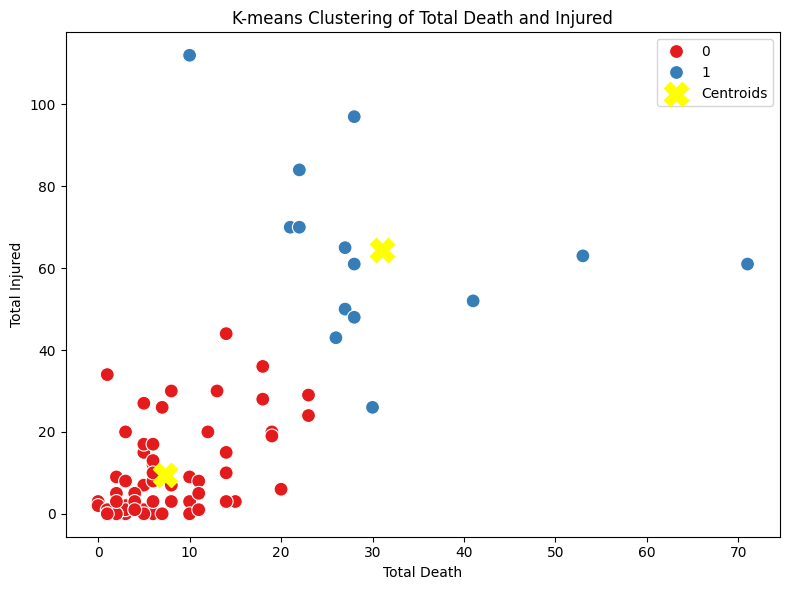

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Time' and calculate the sum of 'Death' and 'Injured'
city_totals = df.groupBy('City').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['City', 'Total_Death', 'Total_Injured']

# Normalizing the data for K-means clustering
scaler = StandardScaler()
city_totals_scaled = scaler.fit_transform(city_totals[['Total_Death', 'Total_Injured']])

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
city_totals['Cluster'] = kmeans.fit_predict(city_totals_scaled)

# Plot the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Death', y='Total_Injured', hue='Cluster', data=city_totals, palette='Set1', s=100)

# Plot the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Set titles and labels
plt.title('K-means Clustering of Total Death and Injured')
plt.xlabel('Total Death')
plt.ylabel('Total Injured')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Cluster Division

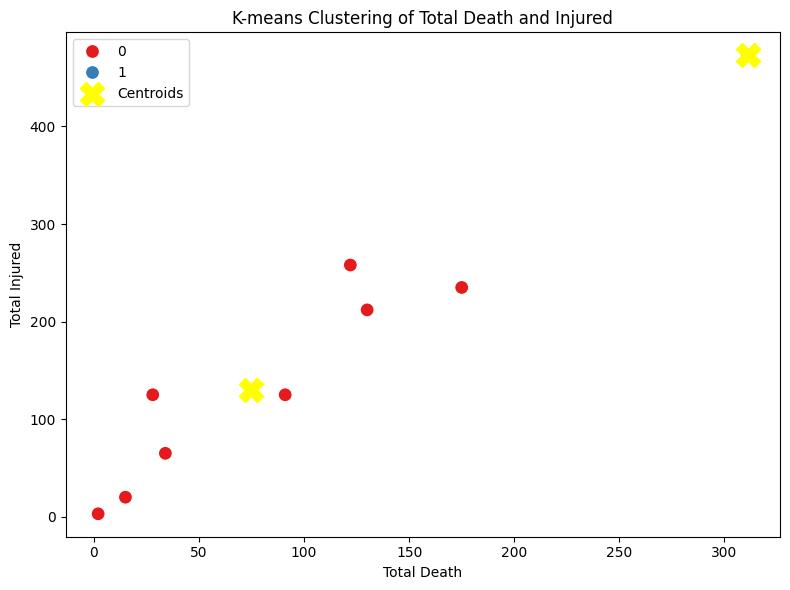

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Time' and calculate the sum of 'Death' and 'Injured'
city_totals = df.groupBy('Division').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['Division', 'Total_Death', 'Total_Injured']

# Normalizing the data for K-means clustering
scaler = StandardScaler()
city_totals_scaled = scaler.fit_transform(city_totals[['Total_Death', 'Total_Injured']])

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
city_totals['Cluster'] = kmeans.fit_predict(city_totals_scaled)

# Plot the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Death', y='Total_Injured', hue='Cluster', data=city_totals, palette='Set1', s=100)

# Plot the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Set titles and labels
plt.title('K-means Clustering of Total Death and Injured')
plt.xlabel('Total Death')
plt.ylabel('Total Injured')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()


# Vehical type

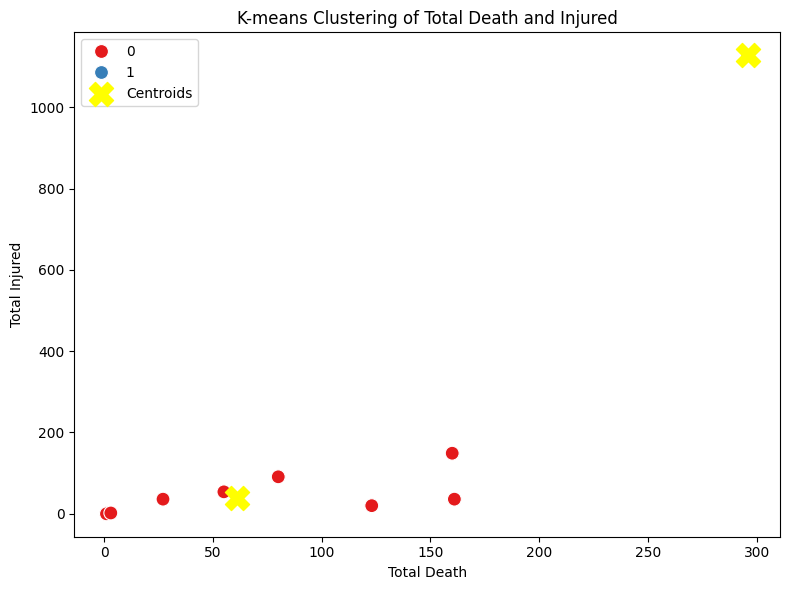

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Convert the Spark DataFrame to Pandas DataFrame
df_pd = df.toPandas()

# Group the data by 'Time' and calculate the sum of 'Death' and 'Injured'
city_totals = df.groupBy('Vehical type').agg({'Death': 'sum', 'Injured': 'sum'}).toPandas()

# Rename columns for better readability
city_totals.columns = ['Vehical type', 'Total_Death', 'Total_Injured']

# Normalizing the data for K-means clustering
scaler = StandardScaler()
city_totals_scaled = scaler.fit_transform(city_totals[['Total_Death', 'Total_Injured']])

# Applying K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
city_totals['Cluster'] = kmeans.fit_predict(city_totals_scaled)

# Plot the clustering results
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Total_Death', y='Total_Injured', hue='Cluster', data=city_totals, palette='Set1', s=100)

# Plot the cluster centroids
centroids = scaler.inverse_transform(kmeans.cluster_centers_)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='yellow', label='Centroids', marker='X')

# Set titles and labels
plt.title('K-means Clustering of Total Death and Injured')
plt.xlabel('Total Death')
plt.ylabel('Total Injured')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()
